In [1]:
from mmpose.apis import Pose2DInferencer, init_model
import cv2

from pyspark.sql.functions import row_number
from pyspark.sql.window import Window
import pandas as pd
from tqdm import tqdm
import gc
from operator import add
import torch
import numpy as np

In [2]:
cv2.__version__

'4.8.0'

In [3]:
#torch.backends.cudnn.benchmark = False

In [4]:
inferencer = Pose2DInferencer(device='cuda',
    model='rtmpose-l_8xb64-270e_coco-wholebody-256x192',
    det_model='yolox_tiny_8x8_300e_coco',
    det_cat_ids=[0],  # the category id of 'human' class
)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-l_simcc-coco-wholebody_pt-aic-coco_270e-256x192-6f206314_20230124.pth
08/02 13:47:38 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
08/02 13:47:38 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_tiny_8x8_300e_coco/yolox_tiny_8x8_300e_coco_20211124_171234-b4047906.pth
08/02 13:47:38 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmeng

In [5]:
#inferencer = Pose2DInferencer('wholebody', device='cuda')

In [7]:
result_generator = inferencer('webcam', show=True, return_vis = True,return_datasample=False)
#cv2.destroyAllWindows()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)
#result = next(result_generator)
results = [result for result in result_generator]
cv2.destroyAllWindows()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [8]:
result_generator = inferencer('demo.jpg', show=True, return_vis = True,return_datasample=False,wait_time=5)
#cv2.destroyAllWindows()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.waitKey(1)
#result = next(result_generator)
#results = [result for result in result_generator]
#cv2.destroyAllWindows()
#result_generator = inferencer('demo2.jpg', show=True, return_vis = True,return_datasample=False,wait_time=5)
result = next(result_generator)
cv2.destroyAllWindows()

Output()

In [9]:
result['visualization'][0]

array([[[  0,  34,  59],
        [  0,  34,  59],
        [  1,  35,  60],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       [[  1,  35,  60],
        [  1,  35,  60],
        [  2,  36,  61],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       [[  3,  37,  62],
        [  3,  37,  62],
        [  3,  37,  62],
        ...,
        [  0,  33,  58],
        [  0,  33,  58],
        [  0,  33,  58]],

       ...,

       [[ 95,  74,  69],
        [ 94,  74,  67],
        [ 92,  71,  66],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[103,  84,  80],
        [ 99,  80,  74],
        [ 95,  76,  72],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[102,  84,  80],
        [ 98,  80,  76],
        [ 95,  76,  72],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]]

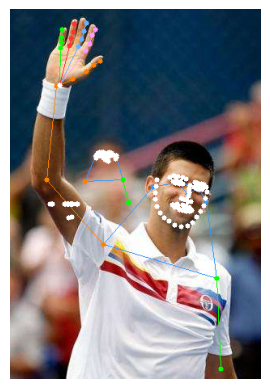

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the given data is stored in the variable 'data'
image_array = result['visualization'][0]

# Display the image using Matplotlib
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

In [11]:
import cv2
import numpy as np

# Assuming the given data is stored in the variable 'data'
image_array = result['visualization'][0]
bgr_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

# Display the image using OpenCV
cv2.imshow('Color Image', bgr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
# Open the video file
#video_path = 0
cap = cv2.VideoCapture("file:///home/kristian/WLASL/videos_organized/address/01018.mp4")
#cap = cv2.VideoCapture(0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        result_generator = inferencer(frame, show=False, return_vis = True,return_datasample=False)
        result = next(result_generator)
        image_array = cv2.cvtColor(result['visualization'][0], cv2.COLOR_RGB2BGR)
        # Display the annotated frame
        cv2.imshow("RTMPose Inference", image_array)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [13]:
result['predictions'][0][0]['keypoints']

[[144.88312315940857, 60.960662841796875],
 [150.99663829803467, 52.966066122055054],
 [137.35879683494568, 53.906606912612915],
 [159.93177580833435, 58.13904047012329],
 [127.95338892936707, 60.960662841796875],
 [178.27232122421265, 97.17148327827454],
 [113.84527707099915, 100.46337604522705],
 [210.72097849845886, 148.9012267589569],
 [79.98580861091614, 153.60393071174622],
 [185.79664754867554, 124.44716620445251],
 [109.14257311820984, 130.09041094779968],
 [166.9858317375183, 188.87421035766602],
 [127.0128481388092, 189.81475114822388],
 [55.06147766113281, 226.02557158470154],
 [235.17503905296326, 226.02557158470154],
 [235.17503905296326, 157.36609387397766],
 [147.23447513580322, 159.71744585037231],
 [235.17503905296326, 226.02557158470154],
 [235.17503905296326, 138.55527806282043],
 [147.23447513580322, 169.59312415122986],
 [194.2615146636963, 226.02557158470154],
 [55.06147766113281, 139.02554845809937],
 [139.2398784160614, 170.0633945465088],
 [128.89392971992493, 

In [14]:
np.array(result['predictions'][0][0]['keypoints']).shape

(133, 2)

In [15]:
def extract_keypoints_from_file(filepath):
    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break

        result_generator = inferencer(frame, show=False, return_vis = False,return_datasample=False)
        result = next(result_generator)
        # Extract the keypoints from the YOLO results object
        if np.array(result['predictions'][0][0]['keypoints']).shape == (133, 2):
            keypoint = np.array(result['predictions'][0][0]['keypoints']).flatten()
        else:
            keypoint = np.zeros(266)

        # Append the keypoints to the list
        keypoints.append(keypoint)
        gc.collect()
        torch.cuda.empty_cache()
    # Release the video capture object and the YOLO model
    cap.release()

    # Convert the keypoints list to a NumPy array
    return np.array(keypoints)


In [16]:
result_generator = inferencer('webcam',
                              show=True, return_vis = True,return_datasample=False,
                              )
results = [result for result in result_generator]
cv2.destroyAllWindows()

Output()

Output()

Output()

Output()

In [17]:
test = extract_keypoints_from_file('file://home/kristian/WLASL/videos_organized/address/01018.mp4')

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [28]:
test

array([[145.13381958,  60.49724206, 151.21958915, ..., 136.56936347,
        125.13771955, 137.00406131],
       [145.11343384,  60.51730835, 151.19977641, ..., 136.59659052,
        125.1154511 , 137.03132927],
       [145.10014343,  60.51176643, 151.18575668, ..., 136.58193207,
        125.10455704, 137.01661873],
       ...,
       [144.90973548,  60.94948748, 151.10218668, ..., 126.68474004,
        126.33238188, 127.63742486],
       [144.87789766,  60.94707242, 151.07084942, ..., 126.68763861,
        126.29904238, 127.64040044],
       [144.89267174,  60.98436084, 151.08716393, ..., 126.74127921,
        126.3091952 , 127.69427803]])

In [18]:
test.shape

(42, 266)

In [19]:
video_df = spark.read.format("binaryFile").option(
    "pathGlobFilter", "*.mp4").load('file:///home/kristian/WLASL/videos_organized/*').orderBy("path")

In [20]:
#create an index column for future join
video_df = video_df.withColumn("columnindex",
                               row_number().over(Window().orderBy("path")))

In [21]:
video_df = video_df.drop('length','modification')

In [22]:
video_df2 = video_df.select("path").collect()

In [23]:
#loop to get labels and filename per row
i = 0
target = []
for row in video_df2:
    subdirname = os.path.basename(os.path.dirname(video_df2[i][0]))
    name = os.path.basename(video_df2[i][0]).split('/')[-1]
    target.append([subdirname, name])
    i = i + 1

In [24]:
target

[['a lot', '02123.mp4'],
 ['a lot', '02124.mp4'],
 ['a lot', '02125.mp4'],
 ['a lot', '02126.mp4'],
 ['a lot', '02128.mp4'],
 ['a lot', '02129.mp4'],
 ['a lot', '02130.mp4'],
 ['a lot', '02131.mp4'],
 ['a', '00295.mp4'],
 ['a', '01610.mp4'],
 ['a', '01611.mp4'],
 ['a', '01612.mp4'],
 ['a', '01613.mp4'],
 ['a', '01614.mp4'],
 ['a', '01615.mp4'],
 ['abdomen', '00333.mp4'],
 ['abdomen', '00335.mp4'],
 ['abdomen', '00336.mp4'],
 ['abdomen', '00338.mp4'],
 ['abdomen', '00339.mp4'],
 ['abdomen', '00340.mp4'],
 ['abdomen', '00341.mp4'],
 ['able', '00374.mp4'],
 ['able', '00376.mp4'],
 ['able', '00377.mp4'],
 ['able', '00378.mp4'],
 ['able', '00381.mp4'],
 ['able', '00382.mp4'],
 ['able', '00383.mp4'],
 ['able', '00384.mp4'],
 ['about', '00412.mp4'],
 ['about', '00414.mp4'],
 ['about', '00415.mp4'],
 ['about', '00416.mp4'],
 ['about', '00421.mp4'],
 ['about', '00422.mp4'],
 ['about', '00423.mp4'],
 ['about', '00424.mp4'],
 ['about', '00425.mp4'],
 ['about', '00426.mp4'],
 ['above', '00429.mp4'

In [25]:
targetRDD = sc.parallelize([row[0] for row in target])

In [26]:
labelcount = targetRDD.map(lambda w: (w, 1))

In [27]:
labelcount = labelcount.reduceByKey(add)

In [28]:
labelcount.sortBy(lambda x: x[1],ascending=False).collect()

[('book', 34),
 ('clothes', 23),
 ('drink', 23),
 ('chair', 22),
 ('before', 22),
 ('computer', 22),
 ('like', 19),
 ('go', 19),
 ('thin', 19),
 ('orange', 18),
 ('cousin', 18),
 ('mother', 18),
 ('hot', 18),
 ('yes', 18),
 ('deaf', 18),
 ('candy', 18),
 ('now', 17),
 ('accident', 17),
 ('black', 17),
 ('who', 17),
 ('wrong', 17),
 ('fine', 17),
 ('bowling', 17),
 ('cool', 17),
 ('woman', 17),
 ('no', 17),
 ('pizza', 17),
 ('table', 17),
 ('thanksgiving', 17),
 ('shirt', 17),
 ('bed', 17),
 ('study', 17),
 ('tall', 17),
 ('white', 17),
 ('bird', 16),
 ('color', 16),
 ('family', 16),
 ('finish', 16),
 ('graduate', 16),
 ('forget', 16),
 ('many', 16),
 ('fish', 16),
 ('thursday', 16),
 ('year', 16),
 ('apple', 16),
 ('dog', 16),
 ('africa', 16),
 ('short', 16),
 ('later', 16),
 ('man', 16),
 ('secretary', 16),
 ('change', 16),
 ('help', 16),
 ('visit', 16),
 ('check', 15),
 ('hat', 15),
 ('school', 15),
 ('water', 15),
 ('corn', 15),
 ('paper', 15),
 ('pink', 15),
 ('play', 15),
 ('pull'

In [29]:
video_df3 = pd.DataFrame(video_df2, columns=['path'])

In [30]:
video_df3.head()

,path
0,file:/home/kristian/WLASL/videos_organized/a l...
1,file:/home/kristian/WLASL/videos_organized/a l...
2,file:/home/kristian/WLASL/videos_organized/a l...
3,file:/home/kristian/WLASL/videos_organized/a l...
4,file:/home/kristian/WLASL/videos_organized/a l...


In [31]:
video_df = video_df3.join(pd.DataFrame(target, columns=['target','file']))

In [32]:
video_df.head(20)

,path,target,file
0,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02123.mp4
1,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02124.mp4
2,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02125.mp4
3,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02126.mp4
4,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02128.mp4
5,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02129.mp4
6,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02130.mp4
7,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02131.mp4
8,file:/home/kristian/WLASL/videos_organized/a/0...,a,00295.mp4
9,file:/home/kristian/WLASL/videos_organized/a/0...,a,01610.mp4


In [33]:
video_df.sample(20)

,path,target,file
4832,file:/home/kristian/WLASL/videos_organized/dol...,dolphin,17157.mp4
9374,file:/home/kristian/WLASL/videos_organized/med...,medicine,35466.mp4
15401,file:/home/kristian/WLASL/videos_organized/the...,therapy,57807.mp4
7230,file:/home/kristian/WLASL/videos_organized/ham...,hamburger,26298.mp4
6406,file:/home/kristian/WLASL/videos_organized/for...,fork,23009.mp4
8001,file:/home/kristian/WLASL/videos_organized/inf...,information,29634.mp4
9059,file:/home/kristian/WLASL/videos_organized/lon...,long,33811.mp4
17172,file:/home/kristian/WLASL/videos_organized/wro...,wrong,70296.mp4
12022,file:/home/kristian/WLASL/videos_organized/qui...,quick,45739.mp4
537,file:/home/kristian/WLASL/videos_organized/ang...,angel,02544.mp4


In [34]:
#loop to get labels and filename per row
i = 0
target2 = []
for row in video_df.path:
    subdirname = os.path.basename(os.path.dirname(video_df.path[i]))
    name = os.path.basename(video_df.path[i]).split('/')[-1]
    target2.append([subdirname])
    i = i + 1

In [35]:
target2

[['a lot'],
 ['a lot'],
 ['a lot'],
 ['a lot'],
 ['a lot'],
 ['a lot'],
 ['a lot'],
 ['a lot'],
 ['a'],
 ['a'],
 ['a'],
 ['a'],
 ['a'],
 ['a'],
 ['a'],
 ['abdomen'],
 ['abdomen'],
 ['abdomen'],
 ['abdomen'],
 ['abdomen'],
 ['abdomen'],
 ['abdomen'],
 ['able'],
 ['able'],
 ['able'],
 ['able'],
 ['able'],
 ['able'],
 ['able'],
 ['able'],
 ['about'],
 ['about'],
 ['about'],
 ['about'],
 ['about'],
 ['about'],
 ['about'],
 ['about'],
 ['about'],
 ['about'],
 ['above'],
 ['above'],
 ['above'],
 ['above'],
 ['above'],
 ['above'],
 ['above'],
 ['accent'],
 ['accent'],
 ['accent'],
 ['accent'],
 ['accent'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accept'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['accident'],
 ['acciden

In [36]:
video_df = video_df.join(pd.DataFrame(target2, columns=['originaltarget']))

In [37]:
video_df.sample(50)

,path,target,file,originaltarget
7881,file:/home/kristian/WLASL/videos_organized/ima...,image,28877.mp4,image
7801,file:/home/kristian/WLASL/videos_organized/hur...,hurt,28440.mp4,hurt
6343,file:/home/kristian/WLASL/videos_organized/foo...,football,22806.mp4,football
2711,file:/home/kristian/WLASL/videos_organized/cer...,certificate,09805.mp4,certificate
2886,file:/home/kristian/WLASL/videos_organized/che...,cheese,10273.mp4,cheese
852,file:/home/kristian/WLASL/videos_organized/asi...,asia,03565.mp4,asia
5559,file:/home/kristian/WLASL/videos_organized/ete...,eternity,19656.mp4,eternity
11110,file:/home/kristian/WLASL/videos_organized/pic...,picture,68131.mp4,picture
13165,file:/home/kristian/WLASL/videos_organized/sen...,senate,50324.mp4,senate
7656,file:/home/kristian/WLASL/videos_organized/hop...,hope,27934.mp4,hope


In [38]:
video_df.head()

,path,target,file,originaltarget
0,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02123.mp4,a lot
1,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02124.mp4,a lot
2,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02125.mp4,a lot
3,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02126.mp4,a lot
4,file:/home/kristian/WLASL/videos_organized/a l...,a lot,02128.mp4,a lot


In [39]:
video_df['frequency'] = video_df['target'].map(video_df['target'].value_counts())

In [40]:
video_df.sample(20)

,path,target,file,originaltarget,frequency
4603,file:/home/kristian/WLASL/videos_organized/dip...,diploma,16355.mp4,diploma,8
15184,file:/home/kristian/WLASL/videos_organized/tem...,temperature,57300.mp4,temperature,13
12055,file:/home/kristian/WLASL/videos_organized/quo...,quote,45824.mp4,quote,7
6825,file:/home/kristian/WLASL/videos_organized/gla...,glass,24735.mp4,glass,8
11394,file:/home/kristian/WLASL/videos_organized/pos...,positive,70365.mp4,positive,7
6019,file:/home/kristian/WLASL/videos_organized/fed...,federal,21368.mp4,federal,7
7155,file:/home/kristian/WLASL/videos_organized/gum...,gum,26002.mp4,gum,9
9337,file:/home/kristian/WLASL/videos_organized/mea...,measure,35340.mp4,measure,9
15191,file:/home/kristian/WLASL/videos_organized/tem...,temperature,57308.mp4,temperature,13
12728,file:/home/kristian/WLASL/videos_organized/rop...,rope,48560.mp4,rope,7


In [41]:
video_df = video_df[video_df['frequency'] > 14]
video_df = video_df.reset_index(drop=True)

In [42]:
video_df.sample(20)

,path,target,file,originaltarget,frequency
1113,file:/home/kristian/WLASL/videos_organized/son...,son,53271.mp4,son,15
1123,file:/home/kristian/WLASL/videos_organized/son...,son,70335.mp4,son,15
560,file:/home/kristian/WLASL/videos_organized/fin...,fine,21890.mp4,fine,17
873,file:/home/kristian/WLASL/videos_organized/man...,many,34830.mp4,many,16
928,file:/home/kristian/WLASL/videos_organized/no/...,no,38541.mp4,no,17
1167,file:/home/kristian/WLASL/videos_organized/tal...,tall,56846.mp4,tall,17
398,file:/home/kristian/WLASL/videos_organized/cor...,corn,13325.mp4,corn,15
445,file:/home/kristian/WLASL/videos_organized/dar...,dark,14671.mp4,dark,15
553,file:/home/kristian/WLASL/videos_organized/fin...,fine,21883.mp4,fine,17
320,file:/home/kristian/WLASL/videos_organized/col...,color,11776.mp4,color,16


In [43]:
video_df.describe()

,frequency
count,1405.000000
mean,17.145196
std,3.330809
min,15.000000
25%,15.000000
50%,16.000000
75%,17.000000
max,34.000000


In [44]:
video_df['target'].nunique()

84

In [45]:
video_df['target'].unique()

array(['accident', 'africa', 'all', 'apple', 'bed', 'before', 'bird',
       'black', 'book', 'bowling', 'candy', 'chair', 'change', 'cheat',
       'check', 'city', 'clothes', 'color', 'computer', 'convince',
       'cook', 'cool', 'corn', 'cousin', 'cow', 'dark', 'deaf', 'decide',
       'dog', 'drink', 'family', 'fine', 'finish', 'fish', 'forget',
       'full', 'give', 'go', 'graduate', 'hair', 'hat', 'headache',
       'hearing', 'help', 'hot', 'kiss', 'language', 'last', 'later',
       'like', 'man', 'many', 'meet', 'mother', 'no', 'now', 'orange',
       'paper', 'pink', 'pizza', 'play', 'pull', 'school', 'secretary',
       'shirt', 'short', 'son', 'study', 'table', 'tall', 'thanksgiving',
       'thin', 'thursday', 'time', 'trade', 'visit', 'water', 'white',
       'who', 'woman', 'wrong', 'year', 'yes', 'yesterday'], dtype=object)

In [46]:
extract_keypoints_from_file(video_df.path[0]).shape

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

(27, 266)

In [47]:
cap = cv2.VideoCapture(video_df.path[0])
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

27


In [48]:
video_df.count()

path              1405
target            1405
file              1405
originaltarget    1405
frequency         1405
dtype: int64

In [49]:
def frames_from_file(filepath):
    cap = cv2.VideoCapture(filepath)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    return length

In [50]:
frames_from_file('file://home/kristian/WLASL/videos_organized/address/01018.mp4')

43

In [51]:
tqdm.pandas()
video_df['frames'] = video_df['path'].progress_apply(frames_from_file)

100%|██████████████████████████████████████| 1405/1405 [00:08<00:00, 172.90it/s]


In [52]:
video_df.head()

,path,target,file,originaltarget,frequency,frames
0,file:/home/kristian/WLASL/videos_organized/acc...,accident,00618.mp4,accident,17,27
1,file:/home/kristian/WLASL/videos_organized/acc...,accident,00623.mp4,accident,17,104
2,file:/home/kristian/WLASL/videos_organized/acc...,accident,00624.mp4,accident,17,109
3,file:/home/kristian/WLASL/videos_organized/acc...,accident,00625.mp4,accident,17,34
4,file:/home/kristian/WLASL/videos_organized/acc...,accident,00626.mp4,accident,17,44


In [53]:
video_df['frames'].max()

212

In [54]:
video_df.head(10)

,path,target,file,originaltarget,frequency,frames
0,file:/home/kristian/WLASL/videos_organized/acc...,accident,00618.mp4,accident,17,27
1,file:/home/kristian/WLASL/videos_organized/acc...,accident,00623.mp4,accident,17,104
2,file:/home/kristian/WLASL/videos_organized/acc...,accident,00624.mp4,accident,17,109
3,file:/home/kristian/WLASL/videos_organized/acc...,accident,00625.mp4,accident,17,34
4,file:/home/kristian/WLASL/videos_organized/acc...,accident,00626.mp4,accident,17,44
5,file:/home/kristian/WLASL/videos_organized/acc...,accident,00627.mp4,accident,17,31
6,file:/home/kristian/WLASL/videos_organized/acc...,accident,00628.mp4,accident,17,35
7,file:/home/kristian/WLASL/videos_organized/acc...,accident,00629.mp4,accident,17,149
8,file:/home/kristian/WLASL/videos_organized/acc...,accident,00631.mp4,accident,17,76
9,file:/home/kristian/WLASL/videos_organized/acc...,accident,00632.mp4,accident,17,55


In [55]:
keypoints_series = video_df['path'].progress_apply(extract_keypoints_from_file)

  0%|                                                  | 0/1405 [00:00<?, ?it/s]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  0%|                                        | 2/1405 [00:07<1:31:43,  3.92s/it]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  0%|                                        | 3/1405 [00:39<6:05:46, 15.65s/it]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  0%|                                        | 4/1405 [01:15<8:57:55, 23.04s/it]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  0%|▏                                       | 5/1405 [01:25<7:13:24, 18.57s/it]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  0%|▏                                       | 6/1405 [01:38<6:32:39, 16.84s/it]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  0%|▏                                       | 7/1405 [01:48<5:39:47, 14.58s/it]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

  1%|▏                                       | 8/1405 [01:59<5:10:36, 13.34s/it]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [67]:
keypoints_series.shape

(1405,)

In [68]:
max(keypoints.shape[0] for keypoints in keypoints_series)

212

In [69]:
min(keypoints.shape[0] for keypoints in keypoints_series)

17

In [70]:
max_len = video_df['frames'].max()

In [71]:
max_len

212

In [72]:
video_df['frames'].describe()

count    1405.000000
mean       72.436299
std        28.148461
min        17.000000
25%        53.000000
50%        71.000000
75%        89.000000
max       212.000000
Name: frames, dtype: float64

In [73]:
keypoints_np = np.zeros((len(keypoints_series), max_len, 266))
for i, keypoints in enumerate(keypoints_series):
    keypoints_np[i, :keypoints.shape[0], :] = keypoints

In [74]:
keypoints_np.shape

(1405, 212, 266)

In [64]:
np.save("/home/kristian/Capstone/keypoints/rtmpose-l_keypoints.npy", keypoints_np)

In [75]:
keypoints_np=np.load('/home/kristian/Capstone/keypoints/rtmpose-l_keypoints.npy')

In [76]:
keypoints_np.shape

(1405, 212, 266)